In [1]:
import pandas as pd               #importando biblioteca pandas 
import matplotlib.pyplot as plt   #importando biblioteca matplotlib
import seaborn as sns             #importando biblioteca seaborn
import numpy as np                #importando biblioteca numpy
import scipy as sci               #importando biblioteca scipy

In [2]:
fonte = "C:/imersao_alura/DADOS/MICRODADOS_ENEM_2019.csv"  #leitura dos dados http://inep.gov.br/microdados > enem > 2019

In [3]:
dados = pd.read_csv(fonte, sep=';', encoding='latin-1')  #importação dos dados

In [4]:
dados.head() # primeiras 5 linhas

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [5]:
dados.shape #total linhas e colunas

(5095270, 136)

In [6]:
#total de 5.092.270 inscritos no enem

In [7]:
dados["SG_UF_RESIDENCIA"].unique() # verificando se temos todas as UFs nos dados

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

In [8]:
len(dados["SG_UF_RESIDENCIA"].unique()) # verificando se temos todas as UFs

27

In [9]:
dados["SG_UF_RESIDENCIA"].value_counts() # contagem candidatos por UF

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

In [10]:
(round((dados["SG_UF_RESIDENCIA"].value_counts(normalize=True)),4)*100)  # proporção de candidatos por UF

SP    15.97
MG    10.58
BA     7.81
RJ     6.65
CE     5.81
PA     5.53
PE     5.33
MA     4.31
RS     4.29
PR     4.12
GO     3.34
PB     2.90
PI     2.38
RN     2.34
AM     2.32
SC     2.15
ES     2.01
DF     1.85
AL     1.80
MT     1.73
SE     1.49
MS     1.38
RO     1.16
TO     0.93
AP     0.83
AC     0.75
RR     0.25
Name: SG_UF_RESIDENCIA, dtype: float64

In [11]:
## podemos observar que a proporção dos candidatos segue a proporção da população:

In [12]:
# https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_populacao
#(segundo estimativas de 1º de julho de 2020)

# posição   UF                  pop total     %
# 1         São Paulo           46 289 333  21,9
# 2         Minas Gerais        21 292 666  10,1  
# 3         Rio de Janeiro      17 366 189   8,2
# 4         Bahia               14 930 634   7,1
# 5         Paraná              11 516 840   5,4
# 6         Rio Grande do Sul   11 422 973   5,4
# 7         Pernambuco           9 616 621   4,5
# 8         Ceará                9 187 103   4,3
# 9         Pará Pará            8 690 745   4,1
# 10        Santa Catarina       7 252 502   3,4
# 11        Maranhão             7 114 598   3,4
# 12        Goiás                7 113 540   3,4
# 13        Amazonas             4 207 714   2,0
# 14        Espírito Santo       4 064 052   1,9
# 15        Paraíba              4 039 277   1,9
# 16        Rio Grande do Norte  3 534 165   1,7
# 17        Mato Grosso          3 526 220   1,7
# 18        Alagoas              3 351 543   1,6
# 19        Piauí                3 281 480   1,6
# 20        Distrito Federal     3 055 149   1,4
# 21        Mato Grosso do Sul   2 809 394   1,3
# 22        Sergipe              2 318 822   1,1
# 23        Rondônia             1 796 460   0,8
# 24        Tocantins            1 590 248   0,7
# 25        Acre                   894 470   0,4
# 26        Amapá                  861 773   0,4
# 27        Roraima                631 181   0,3 
    

In [13]:
dados["NU_IDADE"].value_counts() # candidatos por idade

18    864186
17    847303
19    577161
20    409385
16    316437
       ...  
91         2
92         1
87         1
88         1
94         1
Name: NU_IDADE, Length: 91, dtype: int64

In [14]:
dados["NU_IDADE"].value_counts().sort_index() #ordenando pela menor idade

1     2
2     4
3     4
4     2
5     5
     ..
87    1
88    1
91    2
92    1
94    1
Name: NU_IDADE, Length: 91, dtype: int64

In [15]:
(round((dados["NU_IDADE"].value_counts(normalize=True)),4)*100)  # proporção de candidatos por idade

18    16.96
17    16.63
19    11.33
20     8.03
16     6.21
      ...  
91     0.00
92     0.00
87     0.00
88     0.00
94     0.00
Name: NU_IDADE, Length: 91, dtype: float64

In [16]:
dados.groupby(['SG_UF_RESIDENCIA','NU_IDADE'])['SG_UF_RESIDENCIA'].count() # idades dos candidatos por UF

SG_UF_RESIDENCIA  NU_IDADE
AC                12             1
                  14            50
                  15           371
                  16          1428
                  17          3722
                              ... 
TO                67             1
                  68             2
                  71             1
                  74             1
                  77             1
Name: SG_UF_RESIDENCIA, Length: 1825, dtype: int64

In [17]:
dados.query("NU_IDADE <= 15")["SG_UF_RESIDENCIA"].value_counts() # idade menor ou igual a 15 por UF

SP    11989
MG     8976
CE     6382
PE     6310
BA     6132
PA     4829
GO     4706
MA     4318
PB     3598
PR     3589
PI     2804
RJ     2754
SE     2030
RS     1806
SC     1754
MT     1703
MS     1626
AM     1261
DF     1239
AL     1211
TO     1208
RN     1091
ES      984
RO      756
AP      542
AC      422
RR      206
Name: SG_UF_RESIDENCIA, dtype: int64

Text(0, 0.5, 'Quantidade')

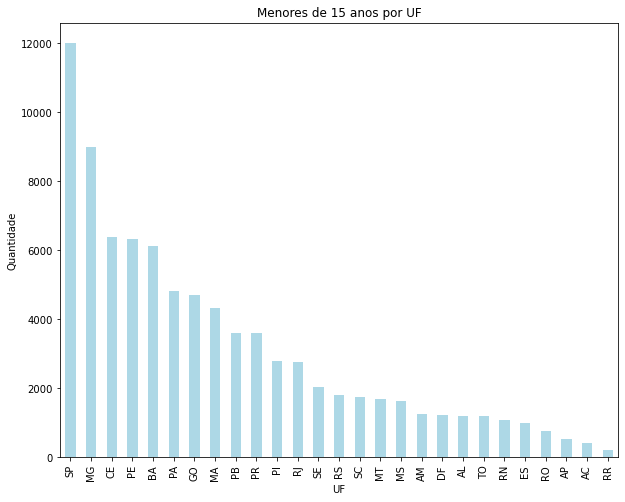

In [18]:
# inscritos com idade menor que 15 anos por estado
dados.query("NU_IDADE <= 15")["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8),color='lightblue')
plt.title("Menores de 15 anos por UF")
plt.xlabel("UF")
plt.ylabel("Quantidade")

Text(0, 0.5, 'Quantidade')

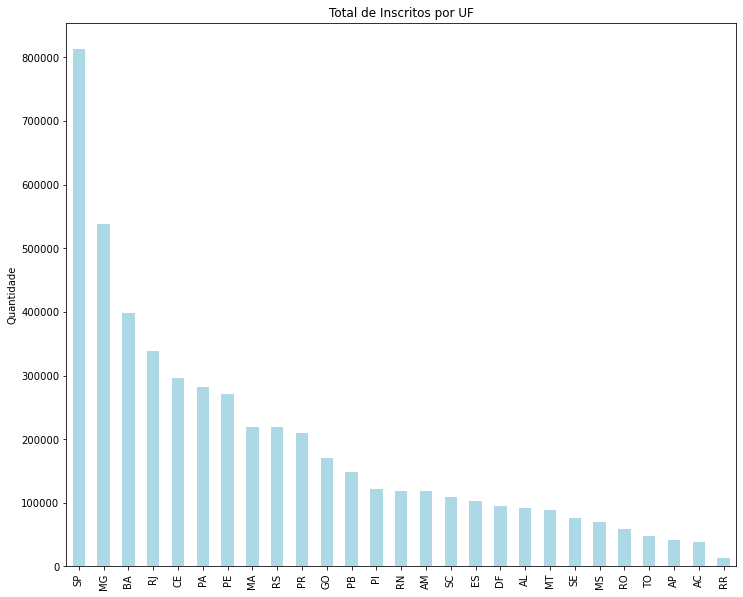

In [19]:
# Total de inscritos por estado
dados["NU_IDADE"],dados["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(12,10),color='lightblue')
plt.title("Total de Inscritos por UF")
plt.ylabel("Quantidade")

Text(0, 0.5, 'Quantidade de Inscritos')

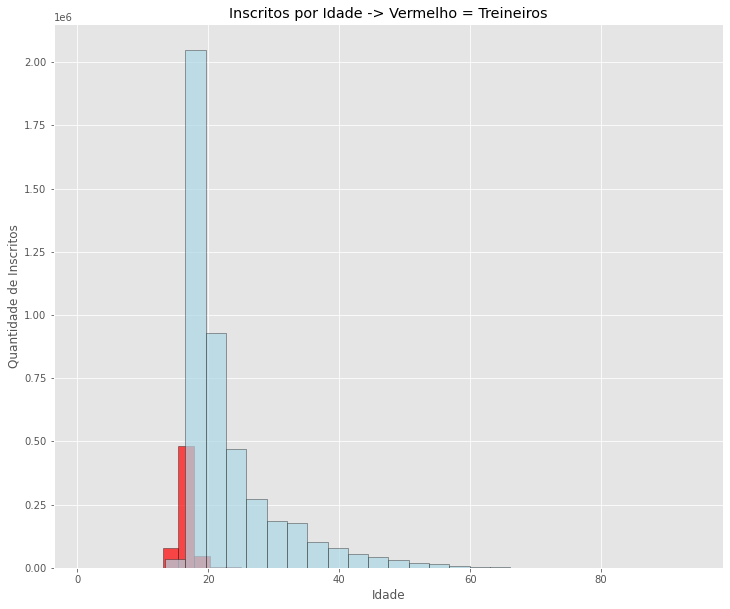

In [20]:
# Total de inscritos por idade Treineiros ou não

plt.style.use("ggplot")
plt.figure(figsize = (12,10))
dados.query("IN_TREINEIRO == 1")['NU_IDADE'].hist(bins=30, ec = "k", alpha = .7, color = "red")
dados.query("IN_TREINEIRO == 0")['NU_IDADE'].hist(bins=30, ec = "k", alpha = .7, color = "lightblue")
plt.title("Inscritos por Idade -> Vermelho = Treineiros")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Inscritos")


In [21]:
dados[dados.IN_TREINEIRO == 1].groupby(['NU_IDADE'])['NU_IDADE'].count() # filtrando apenas treineiros

NU_IDADE
1     1
2     3
4     1
5     1
6     7
     ..
68    2
69    2
70    1
72    1
73    1
Name: NU_IDADE, Length: 70, dtype: int64

In [22]:
#divisão por sexo
dados["TP_SEXO"].value_counts() 


F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

In [23]:
# Contagem, média, mínima, máxima,desvio padrão e quartis por nota
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados[provas].describe()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,3.710433e+06,3.923145e+06,3.710433e+06,3.923145e+06,3.923144e+06
mean,4.778241e+02,5.072487e+02,5.231241e+02,5.205177e+02,5.711883e+02
std,7.609774e+01,8.241163e+01,1.090637e+02,6.415065e+01,1.887633e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.178000e+02,4.479000e+02,4.351000e+02,4.835000e+02,4.800000e+02
50%,4.703000e+02,5.106000e+02,5.011000e+02,5.262000e+02,5.800000e+02
75%,5.332000e+02,5.666000e+02,5.978000e+02,5.653000e+02,6.800000e+02
max,8.609000e+02,8.351000e+02,9.855000e+02,8.017000e+02,1.000000e+03


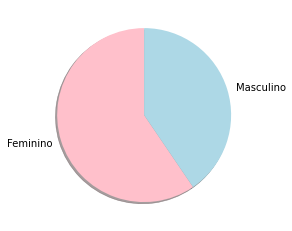

In [24]:
# divisao por sexo

#definição das variaveis
fatias = [3031822,2063448]
titulo = ['Feminino','Masculino']
colunas = ['pink', 'lightblue']
 
# Criando um gráfico
plt.pie(fatias, labels = titulo, colors = colunas, startangle = 90, shadow = True)
 
plt.show()

In [25]:
#criando coluna com a soma das notas
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,C,B,A,D,A,B,A,2585.3
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,B,B,A,B,A,A,A,2353.1
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,A,A,D,B,B,D,A,C,B,2907.0
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,C,A,A,D,A,A,A,0.0
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,B,A,A,D,A,A,A,0.0


Text(0.5, 1.0, 'Notas por estado civil')

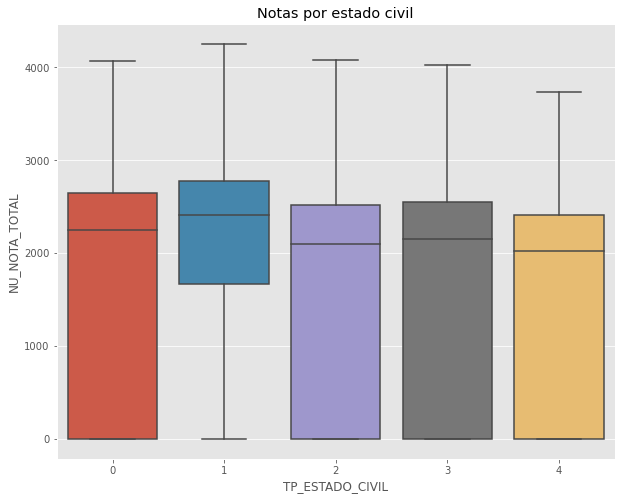

In [26]:
# notas por estado civil
estado_civil = dados["TP_ESTADO_CIVIL"].unique()
estado_civil.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="TP_ESTADO_CIVIL", y="NU_NOTA_TOTAL", data = dados, order= estado_civil)
plt.title("Notas por estado civil")


#0	Não informado
#1	Solteiro(a)
#2	Casado(a)/Mora com companheiro(a)
#3	Divorciado(a)/Desquitado(a)/Separado(a)
#4	Viúvo(a)


Text(0.5, 1.0, 'Notas por raça')

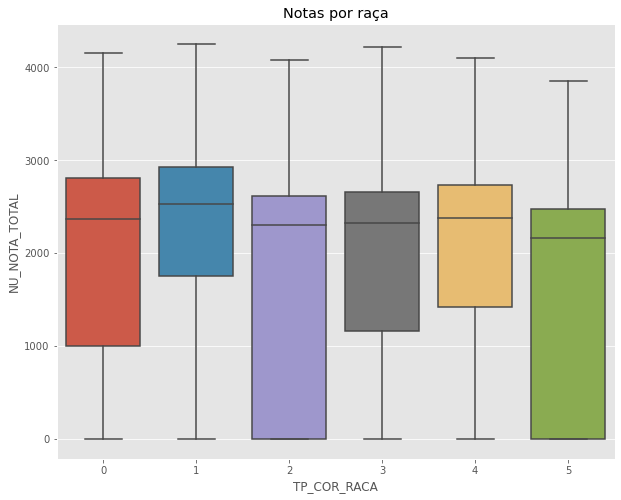

In [27]:
#Notas por raça 
raca = dados["TP_COR_RACA"].unique()
raca.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="TP_COR_RACA",y="NU_NOTA_TOTAL", data = dados,order= raca)
plt.title("Notas por raça")


#0	Não declarado
#1	Branca
#2	Preta
#3	Parda
#4	Amarela
#5	Indígena 


In [28]:
# proporção de raça conforme IBGE
# https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html
# brancos: 46,8%, pardos: 9,4%, Pretos e Amarelos ou indígenas: 1,1% como amarelos ou indígenas

Text(0.5, 1.0, 'Notas por tipo de escola')

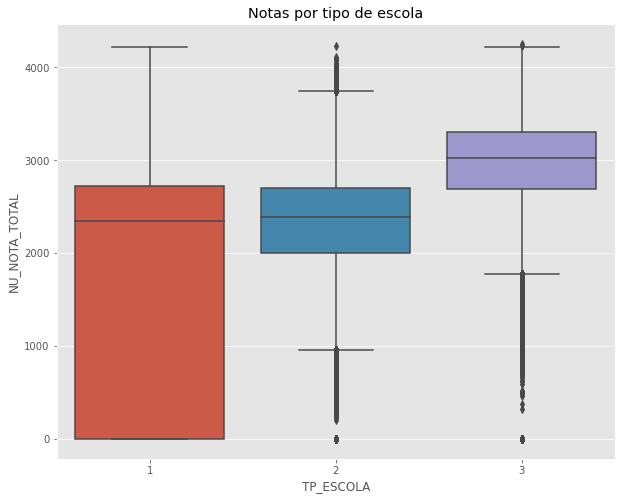

In [29]:
#Notas por tipo de escola
tipo_escola = dados["TP_ESCOLA"].unique()
tipo_escola.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="TP_ESCOLA",y="NU_NOTA_TOTAL", data = dados,order= tipo_escola)
plt.title("Notas por tipo de escola")

#1	Não Respondeu
#2	Pública
#3	Privada
#4	Exterior


In [30]:
##É visível a diferença no total das notas dos inscritos oriundos de escolas privadas

Text(0.5, 1.0, 'Notas por ano de conclusão')

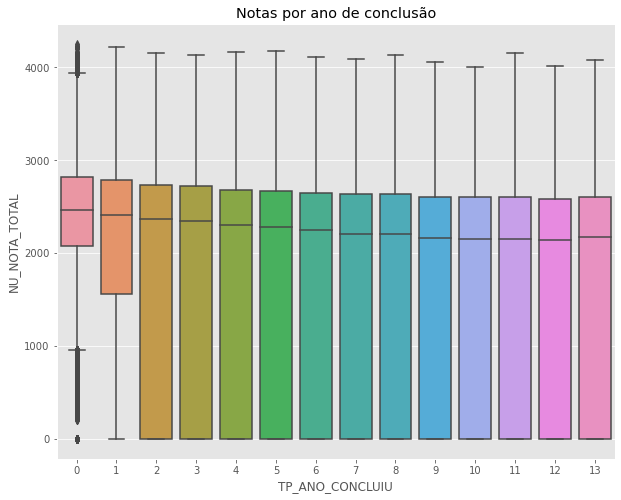

In [31]:
#notas por ano de conclusão

ano_concluiu = dados["TP_ANO_CONCLUIU"].unique()
ano_concluiu.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="TP_ANO_CONCLUIU",y="NU_NOTA_TOTAL", data = dados,order= ano_concluiu)
plt.title("Notas por ano de conclusão")


#0	Não informado
#1	2018
#2	2017
#3	2016
#4	2015
#5	2014
#6	2013
#7	2012
#8	2011
#9	2010
#10	2009
#11	2008
#12	2007
#13	Antes de 2007


In [32]:
# Apenas por curiosidade (já que os dados estavam disponíveis,chequei as notas - e as idades - das gestantes e lactantes)
# é interessante observar que as notas nas duas situações são mais baixas, provavelmente pela dedicação de tempo e energia 
# que as mães precisam dedicar aos seus bebês

Text(0.5, 1.0, 'Notas por gestante')

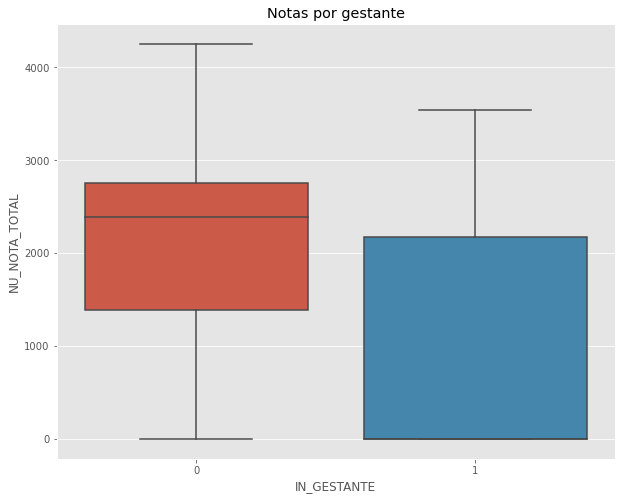

In [33]:
#notas gestantes

gestante = dados["IN_GESTANTE"].unique()
gestante.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="IN_GESTANTE",y="NU_NOTA_TOTAL", data = dados,order= gestante)
plt.title("Notas por gestante")


#1	Sim
#0	Não




Text(0.5, 1.0, 'Idade por gestante')

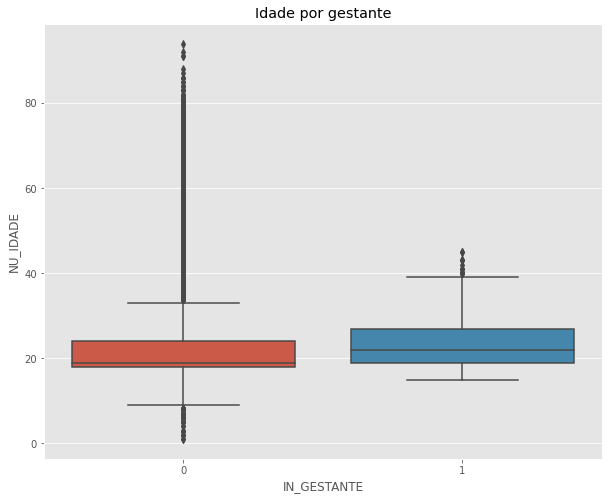

In [34]:
# Idades das gestantes

gestante = dados["IN_GESTANTE"].unique()
gestante.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="IN_GESTANTE",y="NU_IDADE", data = dados,order= gestante)
plt.title("Idade por gestante")


#1	Sim
#0	Não


Text(0.5, 1.0, 'Notas por lactante')

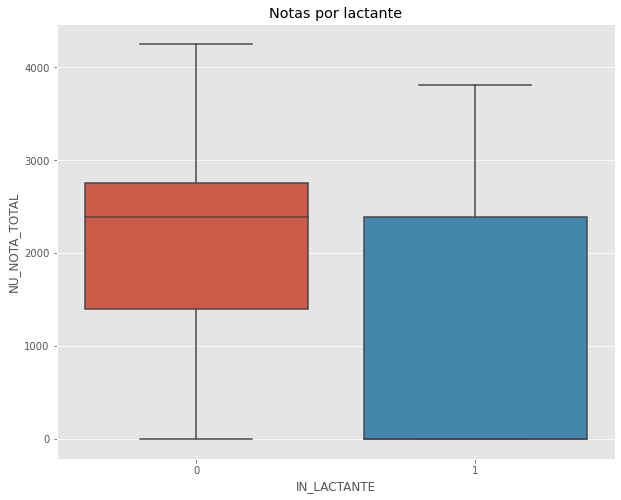

In [35]:
# notas lactantes
lactante = dados["IN_LACTANTE"].unique()
lactante.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="IN_LACTANTE",y="NU_NOTA_TOTAL", data = dados,order= lactante)
plt.title("Notas por lactante")


#1	Sim
#0	Não



Text(0.5, 1.0, 'Idade por lactante')

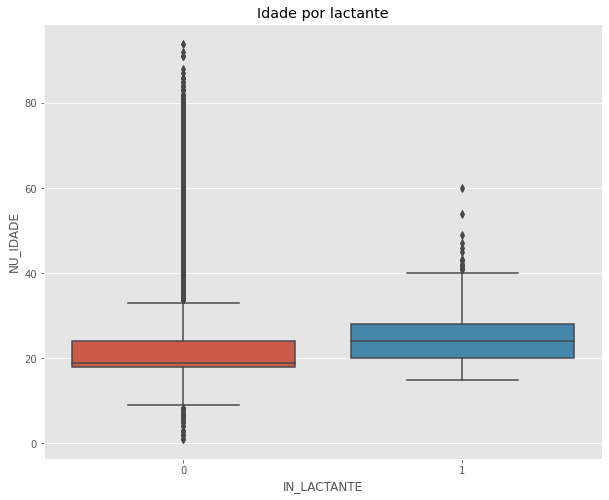

In [36]:
# Idades das lactantes

lactante = dados["IN_LACTANTE"].unique()
lactante.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="IN_LACTANTE",y="NU_IDADE", data = dados,order= lactante)
plt.title("Idade por lactante")

#1	Sim
#0	Não


Text(0.5, 1.0, 'Notas por status da redação')

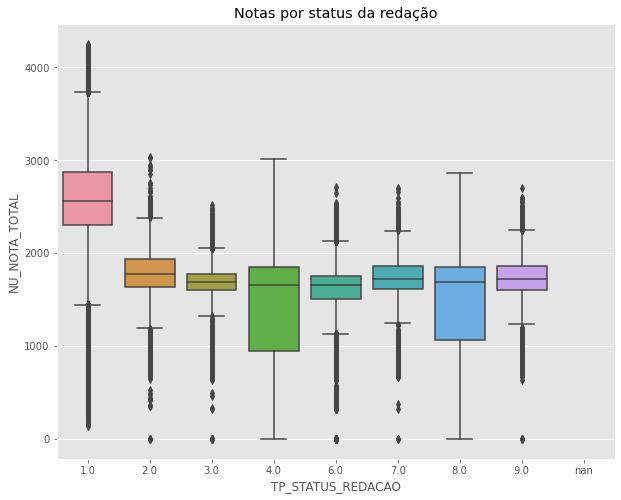

In [37]:
#Notas por status da redação

status_redacao = dados["TP_STATUS_REDACAO"].unique()
status_redacao.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="TP_STATUS_REDACAO",y="NU_NOTA_TOTAL", data = dados,order= status_redacao)
plt.title("Notas por status da redação")


#1	Sem problemas
#2	Anulada
#3	Cópia Texto Motivador
#4	Em Branco
#6	Fuga ao tema
#7	Não atendimento ao tipo textual
#8	Texto insuficiente
#9	Parte desconectada


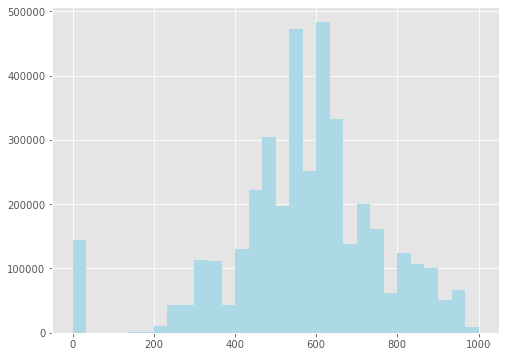

In [38]:
# notas de redação
dados["NU_NOTA_REDACAO"].hist(bins = 30,figsize=(8,6),color = "lightblue") 

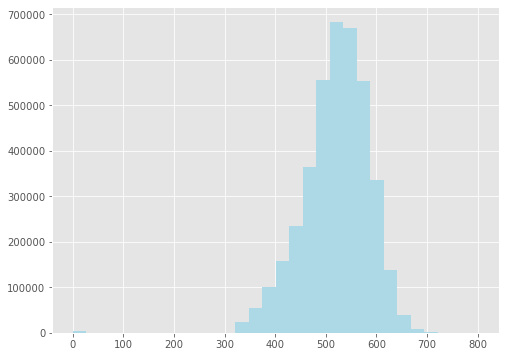

In [39]:
#notas de linguagem
dados["NU_NOTA_LC"].hist(bins = 30,figsize=(8,6),color = "lightblue") 

In [40]:
# Média das notas da redação
round(dados["NU_NOTA_REDACAO"].mean(),2)


571.19

In [41]:
# Desvio padrão das notas da redação
round(dados["NU_NOTA_REDACAO"].std(),2)

188.76

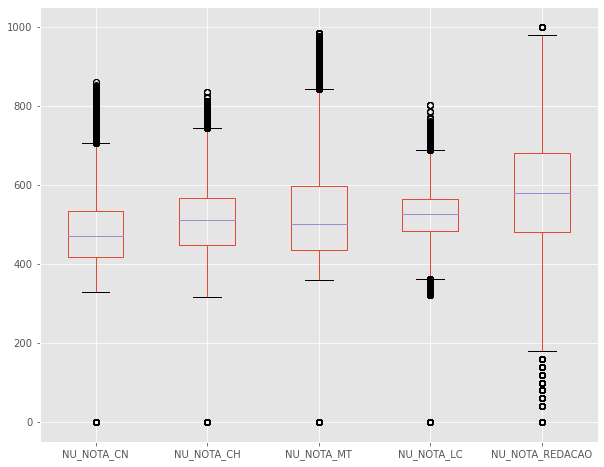

In [42]:
# Notas por prova
dados[provas].boxplot(grid=True, figsize=(10,8))

In [43]:
#divisão de inscritos por lingua estrangeira escolhida
# 0 -> inglês, 1 -> espanhol
dados["TP_LINGUA"].value_counts() 


1    2673498
0    2421772
Name: TP_LINGUA, dtype: int64

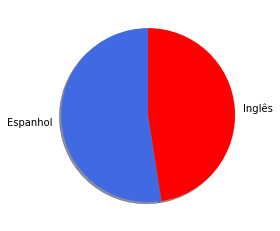

In [44]:
#divisão de inscritos por lingua estrangeira escolhida

#definição das variaveis
fatias = [2673498,2421772]
titulo = ['Espanhol','Inglês']
colunas = ['royalblue', 'red']
 
# Criando um gráfico
plt.pie(fatias, labels = titulo, colors = colunas, startangle = 90, shadow = True)
 
plt.show()



Text(0, 0.5, 'Quantidade de Inscritos')

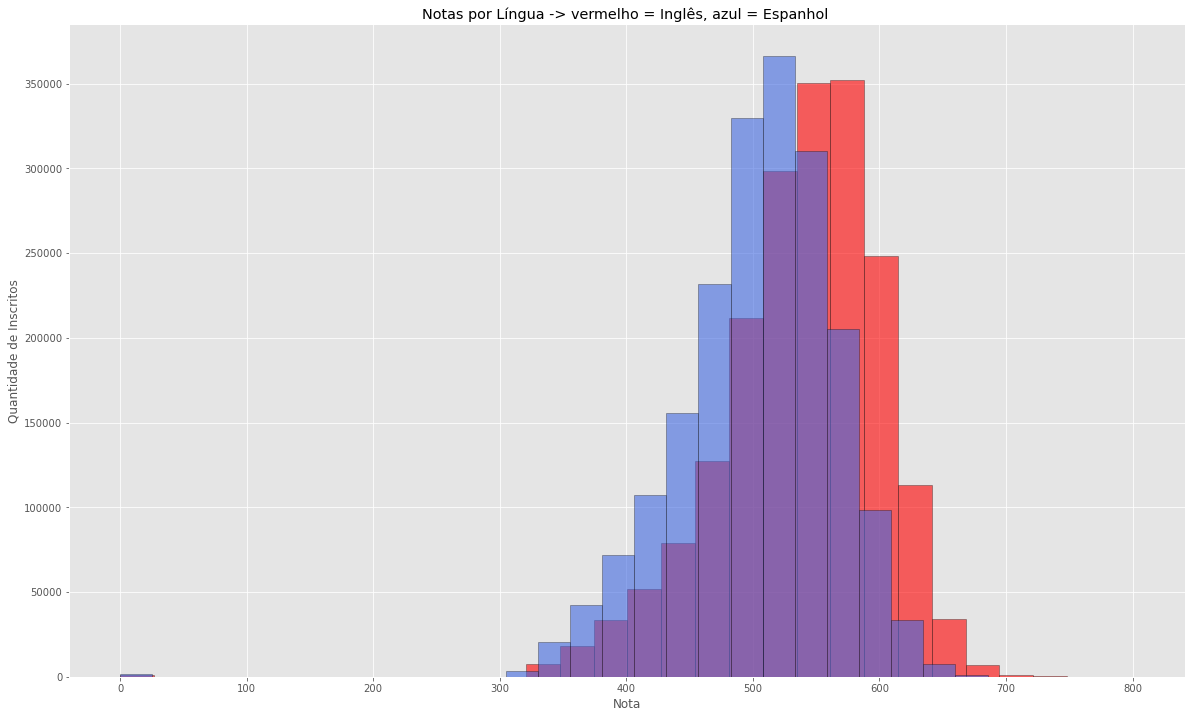

In [45]:
# Comparação das notas por língua estrangeira

plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
dados.query("TP_LINGUA == 0")['NU_NOTA_LC'].hist(bins=30, ec = "k", alpha = .6, color = "red")
dados.query("TP_LINGUA == 1")['NU_NOTA_LC'].hist(bins=30, ec = "k", alpha = .6, color = "royalblue")
plt.title("Notas por Língua -> vermelho = Inglês, azul = Espanhol ")
plt.xlabel("Nota")
plt.ylabel("Quantidade de Inscritos")

Text(0.5, 1.0, 'Notas por Série do Responsável Masculino')

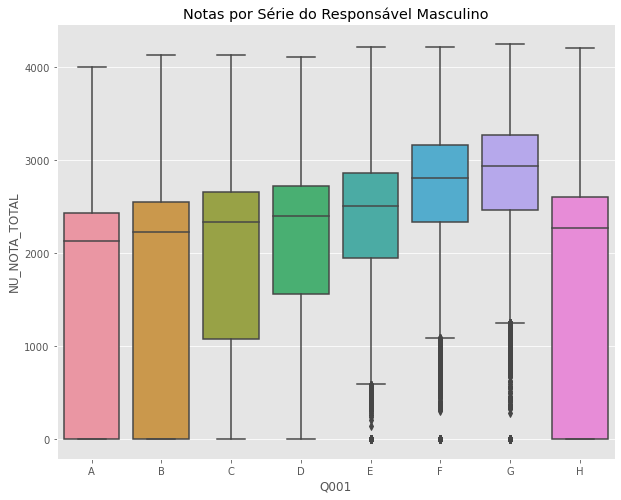

In [46]:
# Notas considerando a série de estudo do responsável masculino
serie_resp = dados["Q001"].unique()
serie_resp.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="Q001",y="NU_NOTA_TOTAL", data = dados,order= serie_resp)
plt.title("Notas por Série do Responsável Masculino")


# A	Nunca estudou.
# B	Não completou a 4ª série/5º ano do Ensino Fundamental.
# C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
# D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
# E	Completou o Ensino Médio, mas não completou a Faculdade.
# F	Completou a Faculdade, mas não completou a Pós-graduação.
# G	Completou a Pós-graduação.
# H	Não sei.


Text(0.5, 1.0, 'Notas por Série do Responsável Feminino')

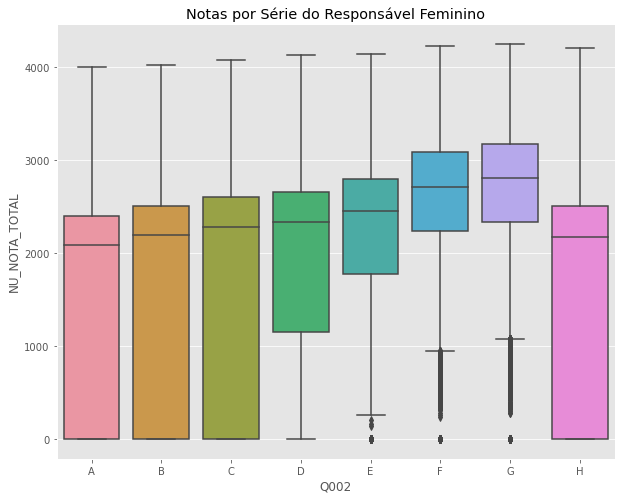

In [47]:
# Notas considerando a série de estudo do responsável feminino
serie_resp = dados["Q002"].unique()
serie_resp.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="Q002",y="NU_NOTA_TOTAL", data = dados,order= serie_resp)
plt.title("Notas por Série do Responsável Feminino")


# A	Nunca estudou.
# B	Não completou a 4ª série/5º ano do Ensino Fundamental.
# C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
# D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
# E	Completou o Ensino Médio, mas não completou a Faculdade.
# F	Completou a Faculdade, mas não completou a Pós-graduação.
# G	Completou a Pós-graduação.
# H	Não sei.

Text(0, 0.5, 'Nota')

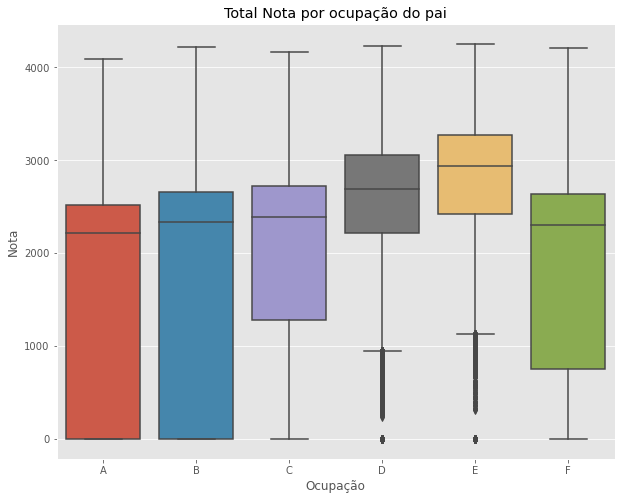

In [48]:
# Notas considerando a ocupação do pai
ocupacao_pai = dados["Q003"].unique()
ocupacao_pai.sort()
plt.figure(figsize = (10,8))
sns.boxplot(x="Q003",y= "NU_NOTA_TOTAL", data = dados, order = ocupacao_pai)
plt.title("Total Nota por ocupação do pai")
plt.xlabel("Ocupação")
plt.ylabel("Nota")

# A	Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
# B	Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
# C	Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
# D	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
# E	Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
# F	Não sei.


Text(0, 0.5, 'Nota')

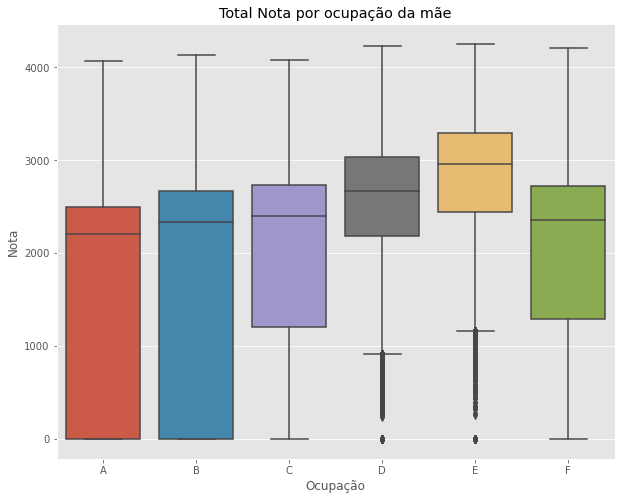

In [49]:
# Notas considerando a ocupação da mãe
ocupacao_mae = dados["Q004"].unique()
ocupacao_mae.sort()
plt.figure(figsize = (10,8))
sns.boxplot(x="Q004",y= "NU_NOTA_TOTAL", data = dados, order = ocupacao_mae)
plt.title("Total Nota por ocupação da mãe")
plt.xlabel("Ocupação")
plt.ylabel("Nota")

# A	Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
# B	Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
# C	Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
# D	Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
# E	Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
# F	Não sei.




Text(0, 0.5, 'Nota')

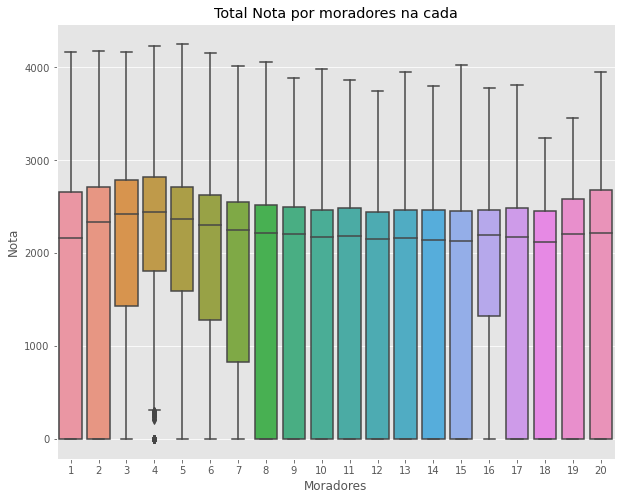

In [50]:
# Notas considerando a quantidade de moradores na casa
moradores = dados["Q005"].unique()
moradores.sort()
plt.figure(figsize = (10,8))
sns.boxplot(x="Q005",y= "NU_NOTA_TOTAL", data = dados, order = moradores)
plt.title("Total Nota por moradores na cada")
plt.xlabel("Moradores")
plt.ylabel("Nota")

# 1	1, pois moro sozinho(a).
# 2	2
# 3	3
# 4	4
# 5	5
# 6	6
# 7	7
# 8	8
# 9	9
# 10	10
# 11	11
# 12	12
# 13	13
# 14	14
# 15	15
# 16	16
# 17	17
# 18	18
# 19	19
# 20	20


Text(0.5, 1.0, 'Notas por Renda')

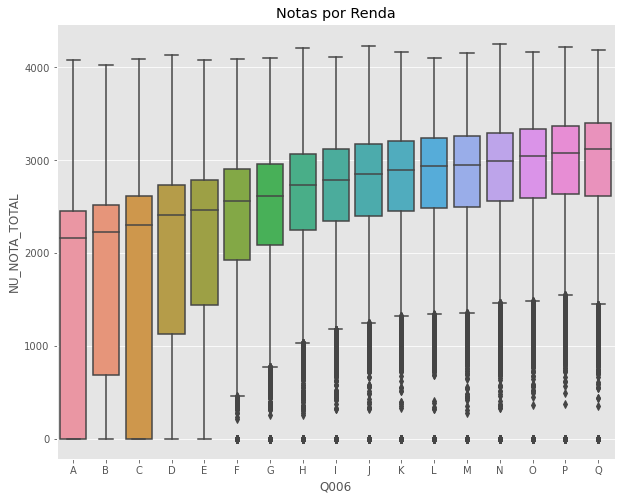

In [51]:
# Notas por renda
# Claramente quanto maior a renda maiores são as notas 

renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006",y="NU_NOTA_TOTAL", data = dados,order= renda_ordenada)
plt.title("Notas por Renda")

# A	Nenhuma renda.
# B	Até R$ 998,00.
# C	De R$ 998,01 até R$ 1.497,00.
# D	De R$ 1.497,01 até R$ 1.996,00.
# E	De R$ 1.996,01 até R$ 2.495,00.
# F	De R$ 2.495,01 até R$ 2.994,00.
# G	De R$ 2.994,01 até R$ 3.992,00.
# H	De R$ 3.992,01 até R$ 4.990,00.
# I	De R$ 4.990,01 até R$ 5.988,00.
# J	De R$ 5.988,01 até R$ 6.986,00.
# K	De R$ 6.986,01 até R$ 7.984,00.
# L	De R$ 7.984,01 até R$ 8.982,00.
# M	De R$ 8.982,01 até R$ 9.980,00.
# N	De R$ 9.980,01 até R$ 11.976,00.
# O	De R$ 11.976,01 até R$ 14.970,00.
# P	De R$ 14.970,01 até R$ 19.960,00.
# Q	Mais de R$ 19.960,00.


Text(0, 0.5, 'Nota')

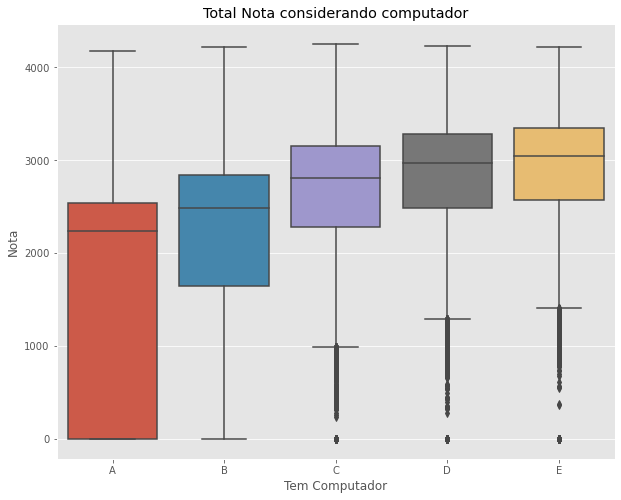

In [52]:
# Nota total considerando a quantidade de computadores na casa
computador = dados["Q024"].unique()
computador.sort()
plt.figure(figsize = (10,8))
sns.boxplot(x="Q024",y= "NU_NOTA_TOTAL", data = dados, order = computador)
plt.title("Total Nota considerando computador")
plt.xlabel("Tem Computador")
plt.ylabel("Nota")


Text(0, 0.5, 'Nota')

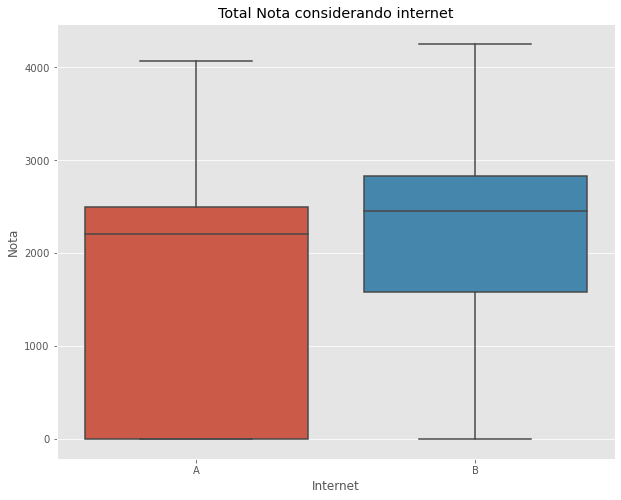

In [53]:
# Nota total considerando se tem ou não internet em casa
plt.figure(figsize = (10,8))
sns.boxplot(x="Q025",y= "NU_NOTA_TOTAL", data = dados)
plt.title("Total Nota considerando internet")
plt.xlabel("Internet")
plt.ylabel("Nota")

# A	Não.
# B	Sim.


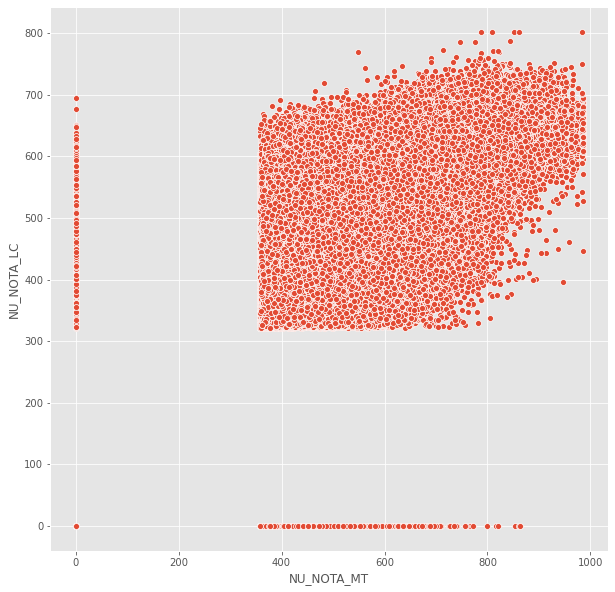

In [54]:
# Comparando as notas em matemática com as notas em lingua

plt.figure(figsize=(10,10))
sns.scatterplot(data=dados, x="NU_NOTA_MT", y="NU_NOTA_LC")

In [55]:
# definição dos dados para gerar predições
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas = dados[provas].dropna()
notas_entrada = dados_sem_notas[provas_entrada]
notas_saida = dados_sem_notas[prova_saida]

x=notas_entrada
y=notas_saida

In [56]:
# diviindo entre dados de treino e testes
# como usei os dados completos, usei menos dados para treino
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.90, random_state=20)

In [57]:
# usando o modelo LinearSVR
from sklearn.svm import LinearSVR
modelo = LinearSVR(random_state=20)
modelo.fit(x_treino, y_treino)

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=20)

In [58]:
predicoes_matematica = modelo.predict(x_teste)

In [59]:
y_teste[:5]

4781806    490.9
885024     459.1
1638283    614.4
1125966    618.8
2924102    443.7
Name: NU_NOTA_MT, dtype: float64

(-500.0, 1050.0)

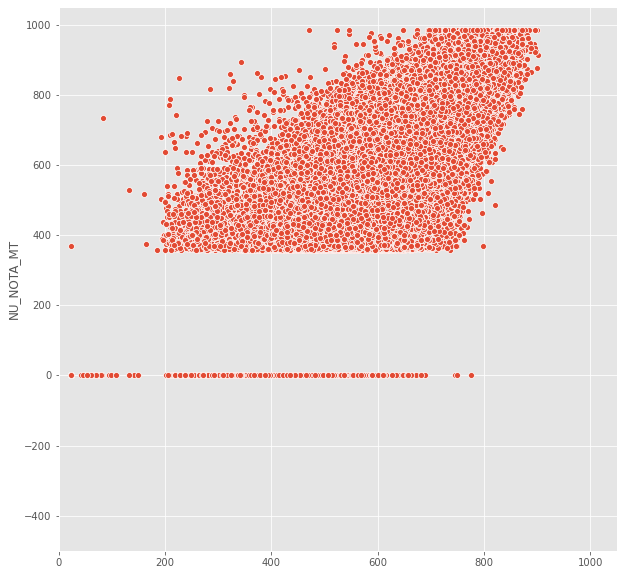

In [60]:
#resultado do modelo
plt.figure(figsize=(10,10))
sns.scatterplot(x=predicoes_matematica,y=y_teste)
plt.xlim((0,1050))
plt.ylim((-500,1050))


(-500.0, 1050.0)

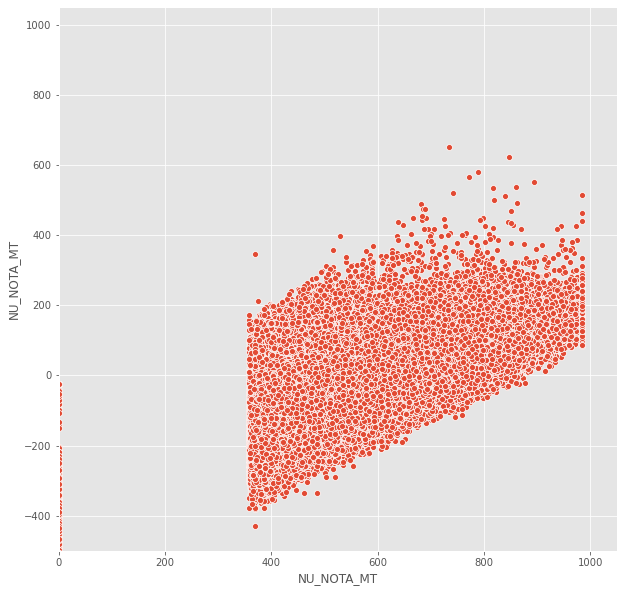

In [61]:
# comparando os dados de testes com os dados previstos
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste,y=y_teste - predicoes_matematica)
plt.xlim((0,1050))
plt.ylim((-500,1050))

(-50.0, 1050.0)

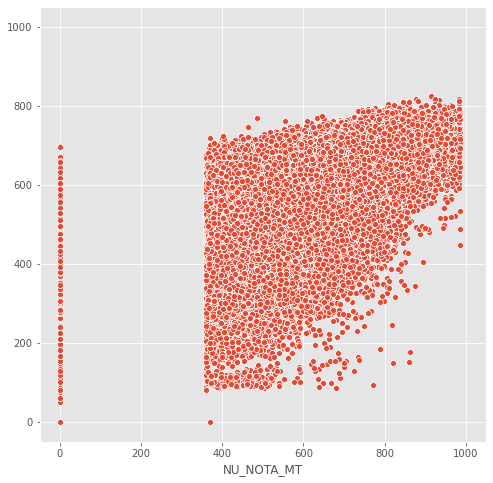

In [62]:
# comparando os dados de testes com a média dos testes
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [63]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [64]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
4781806,490.9,655.976153,-165.076153,27250.136276
885024,459.1,640.458585,-181.358585,32890.936265
1638283,614.4,575.913830,38.486170,1481.185310
1125966,618.8,645.296668,-26.496668,702.073415
2924102,443.7,455.603827,-11.903827,141.701103
...,...,...,...,...
5057369,509.6,589.302285,-79.702285,6352.454182
138582,457.6,537.610865,-80.010865,6401.738538
2691022,827.7,745.776805,81.923195,6711.409926
290236,724.6,704.792062,19.807938,392.354421


In [65]:
resultados["quadrado_diferenca"].mean()

8789.15163027277

In [66]:
resultados["quadrado_diferenca"].mean()**(1/2)

93.75047536024962

In [67]:
#usando o DummyRegressor
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [68]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

11886.39983759092

In [69]:
mean_squared_error(y_teste, predicoes_matematica)

8789.151630273089

In [70]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=20)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


8789.151630273089

In [71]:
# com o Decision Tree
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.95)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

6031.217887173366

In [72]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()

In [73]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 5991.999602268348 - 7057.416907167586


In [74]:
# Intervalo de Confiança:
#fonte: https://pt.wikipedia.org/wiki/Intervalo_de_confiança

# Intervalo de confiança (IC) é um tipo de estimativa por intervalo de um parâmetro populacional desconhecido, é calculado a 
# partir de observações e pode variar de amostra para amostra.

# I intervalo de confiança calculado a partir de uma amostra particular não inclui necessariamente o valor real do 
# parâmetro. Quando se tem 99% de confiança de que o valor real do parâmetro está no intervalo de confiança, significa 
# que 99% dos intervalos de confiança observados têm o valor real do parâmetro. 

# O nível de confiança é a frequência com a qual o intervalo observado contém o parâmetro real de interesse quando o 
# experimento é repetido várias vezes. O nível de confiança desejado é determinado pelo pesquisador, não pelos dados. Se um 
# teste de hipótese for realizado, o nível de confiança é o complemento do nível de significância. Isto é, um intervalo de 
# confiança de 95% reflete um nível de significância de 0,05.

# Os intervalos de confiança são tipicamente estabelecidos no nível de confiança de 95%. Certos fatores podem afetar o 
# tamanho do intervalo de confiança, incluindo o tamanho da amostra, o nível de confiança e a variabilidade da população. 
# Um tamanho de amostra maior normalmente levará a uma estimativa melhor do parâmetro populacional.


In [75]:
resultados["test_score"]*-1

array([6052.49863301, 6533.54520161, 6330.94211109, 6453.23340582,
       6151.98651055, 6621.69662021, 6843.02955945, 6673.62641555,
       6675.6680606 , 6910.8560293 ])

In [76]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [77]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(20)

partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5993.418821066963 - 6066.863462853277


In [78]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5769.62253055968|Teste = 5772.177407767342


In [79]:
for i in range(1,11):
    regressor_arvore(i)

Treino = 7822.327538966689|Teste = 7823.3226068181175
Treino = 6515.493098509297|Teste = 6517.797525847166
Treino = 6028.14502998792|Teste = 6030.268996248677
Treino = 5769.62253055968|Teste = 5772.177407767342
Treino = 5612.6061519055265|Teste = 5616.603450230618
Treino = 5508.245610402437|Teste = 5513.6198876054
Treino = 5444.130718722579|Teste = 5454.214210395141
Treino = 5397.79593249188|Teste = 5413.879059888031
Treino = 5360.058685804559|Teste = 5385.349943965006
Treino = 5329.5784740566805|Teste = 5369.896368862512


In [80]:
# Underfitting e Overfitting
# Fonte: https://abracd.org/overfitting-e-underfitting-em-machine-learning/

# Underfitting é uma tradução para o inglês de sub-ajustado. Ou seja, nosso modelo não conseguiu aprender suficiente 
# sobre os dados. O underfitting leva à um erro elevado tanto nos dados de treino quando nos dados de teste.

# Overfitting é o oposto. O termo vem da tradução de sobre-ajustado. É quando o modelo aprende demais sobre os dados. 
# Neste caso, o modelo mostra-se adequado apenas para os dados de treino, como se o modelo tivesse apenas decorado os 
# dados de treino e não fosse capaz de generalizar para outros dados nunca vistos antes. Quando isso acontece, os dados 
# de treino apresentam resultados excelentes, enquanto que a performance do modelo cai drasticamente com os dados de teste.